<a href="https://colab.research.google.com/github/aadi-mishra/Deep-Learning-Projects-Keras/blob/main/Fashion_MNIST_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Local Deployment Steps 
* We save our trained model
* We install TensorFlow ModelServer. ModelServer provides the server that a client program can use to access our trained model.
* We the launch our TF ModelServer providing a specific end-point for out trained model.
* Lastly, we create code that will call these server end-point and pass an image. The image will be classified by our model and the predicted class returned to the client.

In [ ]:
# Install Tensorflow ModelServer 



In [ ]:
# Import Libraries
from keras.datasets import fashion_mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


import tempfile
import os




In [ ]:
# Define class names to display
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Our ML workflow
* Get data --Load Fashion MNIST data
* Prepare Data -- Pre-process data
* Create Model -- Define network structure 
* Define loss measurement -- use sparse categorical cross-entropy
* Train model to minimize loss -- Use optimizer with backprop to update model's weights to minimize loss 
* Evaluate training performance -- Measure loss on training data 
* Evaluate testing performance -- Measure loss on testing data

In [ ]:
# Load the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
# Inspecting our data 
print("Training dataset : ", train_images.shape, train_labels.shape)
print("Testing dataset : ", test_images.shape, test_labels.shape)
print(train_labels[100])

Training dataset :  (60000, 28, 28) (60000,)
Testing dataset :  (10000, 28, 28) (10000,)
8


In [ ]:
# Visualizing an image and its associated label
def show_training_image(index):
  img_label = str(train_labels[index]) + ' (' + class_names[train_labels[index]] + ')'
  plt.figure()
  plt.title('Image Label ' + img_label)
  plt.imshow(train_images[index], cmap='gray')
  plt.colorbar()
  plt.show()


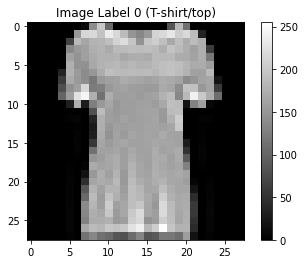

In [ ]:
img_index = 10
show_training_image(img_index)

### Prepare Data

In [ ]:
# Normalizing our data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


### Creating Model

 

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Visualising our network 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
# Compiling the model 
train_hist = model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Traiining the model
train_hist = model.fit(train_images, train_labels, epochs=9, batch_size = 128)

Epoch 1/9
469/469 [==============================] - 47s 99ms/step - loss: 0.1084 - accuracy: 0.9597
Epoch 2/9
469/469 [==============================] - 46s 99ms/step - loss: 0.0995 - accuracy: 0.9633
Epoch 3/9
469/469 [==============================] - 46s 99ms/step - loss: 0.0925 - accuracy: 0.9657
Epoch 4/9
469/469 [==============================] - 46s 99ms/step - loss: 0.0857 - accuracy: 0.9683
Epoch 5/9
469/469 [==============================] - 47s 100ms/step - loss: 0.0791 - accuracy: 0.9711
Epoch 6/9
469/469 [==============================] - 46s 98ms/step - loss: 0.0744 - accuracy: 0.9727
Epoch 7/9
469/469 [==============================] - 47s 99ms/step - loss: 0.0683 - accuracy: 0.9743
Epoch 8/9
469/469 [==============================] - 47s 99ms/step - loss: 0.0636 - accuracy: 0.9770
Epoch 9/9
469/469 [==============================] - 47s 100ms/step - loss: 0.0605 - accuracy: 0.9773


In [ ]:
def plot_acc(hist):
  # plot the accuracy
  plt.title('Accuracy History')
  plt.plot(hist.history['accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.show()
  
def plot_loss(hist):
  # plot the loss
  plt.title('Loss History')
  plt.plot(hist.history['loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()

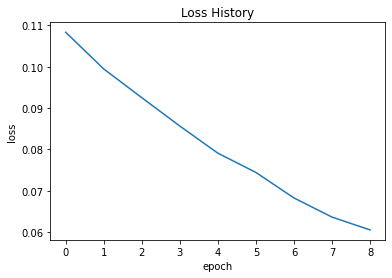

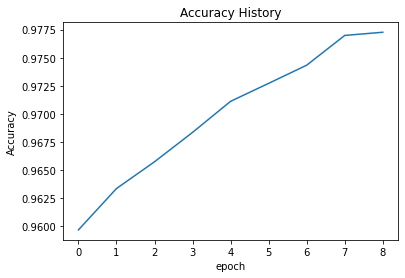

In [ ]:
plot_loss(train_hist)
plot_acc(train_hist)

In [ ]:
# get the tempfile location for this Colab session
MODEL_DIR = tempfile.gettempdir()
version = 1   # NOTE: Adjust if you don't want to replace a version of your model
export_path = os.path.join(MODEL_DIR, str(version))  # the final path includes the version
print('Saving model to : {}\n'.format(export_path))

# if path already exists delete everything at the location
if os.path.isdir(export_path):
  print('\nPreviously saved model found, deleting it\n')
  !rm -r {export_path}

# Save the model  
tf.saved_model.save(model, export_path)

# Print save complete message
print('Model saved')


Saving model to : /tmp/1

INFO:tensorflow:Assets written to: /tmp/1/assets
Model saved


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
%cd TFmodels/

/content/gdrive/My Drive/TFmodels


In [ ]:
!ls

my_model.h5


# Deploying our Trained Model

Once we are satisified with the model's performance we can deploy it so other programs can use it.  This is a complex subject since the deployment strategies depend on how our model will be used.

In this script we will show a very basic way of deploying the model.  We will do just enough so we can make predictions with our trained model from Python.


## TensorFlow ModelServer

We are going to use the Tensorflow ModelServer to serve our model.  This install may only work in Colab.  

*The recommendation for general installation and usage of the server is to use a docker container.  This is documented in the repo, https://github.com/tensorflow/serving/blob/master/tensorflow_serving/g3doc/setup.md*

## Add TensorFlow Serving as installable

Before we can install the TensorFlow ModelServer we need to make it known to the APT installer so the installer know where to fetch the bits.

We do this by adding a key in to the APT database refering to the tensorflow-serving files location.

In [ ]:
# add the key
!echo 'deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal' | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
# update the database with the new key
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  14939      0 --:--:-- --:--:-- --:--:-- 14939
OK
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [52.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  R

## Install TensorFlow ModelServer
We use apt-get to fetch and install TensorFlow ModelServer

In [ ]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 50 not upgraded.
Need to get 223 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.4.1 [223 MB]
Fetched 223 MB in 4s (56.5 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 160980 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.4.1_all.deb ...
Unpacking tensorflow-model-server (2.4.1) ...
Setting up tensorflow-model-server (2.4.1) ...


### Start TensorFlow ModelServer

This is where we start TensorFlow ModelServer and load our model.  After it loads we can start making inference requests using REST.  There are some important parameters:

* `rest_api_port`: The port that you'll use for REST requests.
* `model_name`: You'll use this in the URL of the REST requests.  It can be anything.
* `model_base_path`: This is the path to the directory where you've saved your model.

We need to define these as Python variables and as shell environment variables.  This will make this information available in Python code and in 
the shell where we will start the TensorFlow ModelServer process.

In [ ]:
# Define the environment variable where our saved model resides
os.environ['MODEL_DIR'] = MODEL_DIR
# Define the Python constant and environment variable to point to the port number used to access our model
REST_PORT = '8501'
os.environ['REST_PORT'] = REST_PORT
# Define the Python constant and environment variable to point to the our model name.
#  This is an abitrary name.
MODEL_NAME = 'fashion_mnist'
os.environ['MODEL_NAME'] = MODEL_NAME

In [ ]:
# Run the shell command to launch tensorflow_model_server.  Output status and error
#  messages to the file server.log
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port="${REST_PORT}" \
  --model_name="${MODEL_NAME}" \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1


Starting job # 0 in a separate thread.


In [ ]:
# Display the tail (last few lines) of the server log which will show any errors
!tail server.log

2021-04-03 18:37:32.821300: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:206] Restoring SavedModel bundle.
2021-04-03 18:37:32.822904: I external/org_tensorflow/tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz
2021-04-03 18:37:32.864689: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:190] Running initialization op on SavedModel bundle at path: /tmp/1
2021-04-03 18:37:32.872398: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:277] SavedModel load for tags { serve }; Status: success: OK. Took 87546 microseconds.
2021-04-03 18:37:32.873635: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /tmp/1/assets.extra/tf_serving_warmup_requests
2021-04-03 18:37:32.873875: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: fashion_mnist version: 1}
2021-04-03 18:37:32.875189: I tensorflow_serving/model_servers/server.cc:371] 

In [ ]:
def show_image(index, title, show_colorbar=False):
  plt.figure()
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})
  plt.imshow(test_images[index].reshape(28,28), cmap='gray')  # data is grayscale, but displays in color without cmap='gray'
  if (show_colorbar):
    plt.colorbar()
  plt.axis('off')
  plt.show()
  

In [ ]:
!pip install -q requests    # Install the requests library which makes HTTP requests to the TensorFlow server 
                            # using our trained our model 
import requests     # import requests 

In [ ]:
# Select a random image to classify
import random
image_index = random.randint(0,len(test_images)-1)


In [ ]:
 # Import json library and create the json data structure to be passed in the request.
import json

# The data is assumed to be a list of images, a 4D tensor of the shape [*,28,28,1].  
# Convert the single 3d to 4d
check_images = np.reshape(test_images[image_index],(-1,28,28,1))

# Construct json data passed to server.  "instances" will hold the image(s) we 
#   want the model to classify
data = json.dumps({'signature_name': 'serving_default', 'instances': check_images.tolist()}) 

In [ ]:
 #Create the request

# HTTP request header
headers = {'content-type': 'application/json'}

# Build the url to the service using the constants we defined earlier, should be of the form:
#      http://localhost:8501/v1/models/fashion_mnist:predict
predict_service_url = 'http://localhost:' + REST_PORT + '/v1/models/' + MODEL_NAME + ':predict'

# Make request to the service.  Pass the headers and data.  Wait for the server's reponse.
json_response = requests.post(predict_service_url, data=data, headers=headers)

# Parse the response.  For each images we pass we get a list of probabilities 
predictions = json.loads(json_response.text)['predictions']
# predictions[0] is the 10 probabilites for our first and only image.
# predictions[0] has values in the form [0.1, 0.05, ...., 0.6]

# The numpy argmax function returns the index of the highest value.  This is 
# the highest probabilty class predicted by our model. 
predicted_class = np.argmax(predictions[0])

# Display image, the actual class and the predicted class
show_image(img_index, 'Model predicted class: {} (class {}). \n Actually class: {} (class {})'.format(
  class_names[predicted_class], predicted_class, class_names[test_labels[image_index]], test_labels[image_index]))

TypeError: ignored